In [1]:
# 匯入所需的函式庫和模組
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
# 加載數據集
mnist = keras.datasets.mnist

# train_data 和 train_label 為訓練集圖片和對應的標籤
# test_data 和 test_label 為測試集圖片和對應的標籤
(train_data, train_label), (test_data, test_label) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# 查看訓練集圖片的資料(type)型態和(shape)形狀
print("訓練集圖片的資料型態:", type(train_data))
print("訓練集圖片的形狀:", train_data.shape)

# 查看訓練集標籤的資料(type)型態和(shape)形狀
print("訓練集標籤的資料型態:", type(train_label))
print("訓練集標籤的形狀:", train_label.shape)

# 查看測試集圖片和標籤的形狀
print("測試集圖片的形狀:", test_data.shape)
print("測試集標籤的形狀:", test_label.shape)


訓練集圖片的資料型態: <class 'numpy.ndarray'>
訓練集圖片的形狀: (60000, 28, 28)
訓練集標籤的資料型態: <class 'numpy.ndarray'>
訓練集標籤的形狀: (60000,)
測試集圖片的形狀: (10000, 28, 28)
測試集標籤的形狀: (10000,)


In [19]:
print("訓練集第一筆資料的標籤:", train_label[0])

print("訓練集第一筆圖片的像素數據:")
print(train_data[0])

訓練集第一筆資料的標籤: 5
訓練集第一筆圖片的像素數據:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 

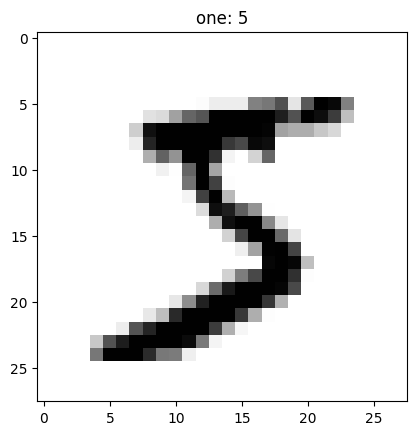

In [20]:
# 匯入模組
import matplotlib.pyplot as plt

# 使用imshow函式顯示第一張訓練圖片使用色階顯示為二值化效果（黑白）
plt.imshow(train_data[0], cmap='binary')  # 'binary' 色階將灰度圖像顯示為黑白
plt.title(f"one: {train_label[0]}")  # 在圖片上顯示對應的標籤作為標題
plt.axis('on')  # 顯示座標軸
plt.show()  # 顯示圖片


In [24]:
# 建立模型
model = Sequential()

# 第一層：將輸入的 28x28 的影像展平為一維向量
model.add(Flatten(input_shape=(28, 28)))

# 隱藏層：全連接層，包含 64 個神經元，激活函數為 ReLU
model.add(Dense(64, activation='relu'))

# 輸出層：包含 20 個神經元，對應 0-19 的數字分類，激活函數使用 sigmoid
model.add(Dense(20, activation='sigmoid'))

# 編譯模型
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
# 訓練模型
model.fit(train_data, train_label, epochs=20, batch_size=512)  # 訓練 40 個世代，每次批次大小為 1024

# 評估模型性能
score = model.evaluate(test_data, test_label)
print("測試準確率:", score[1])

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2295 - loss: 22.7541
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2673 - loss: 1.9180
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 0.6524
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3684 - loss: 0.3917
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3452 - loss: 0.3024
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3203 - loss: 0.2547
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3021 - loss: 0.2060
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2913 - loss: 0.1722
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2844 - loss: 0.1507
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2713 - loss: 0.1331
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2659 - loss: 0.1259
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste